# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from statistics import mean
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
t_city=[]
lat_city=[]
lng_city=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
units="imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url).json()
    if (weather_response['cod']=='404'):
        print(f"City not found City name: {city}")
    else:
        print(f"Processing city id: {weather_response['id']} city name: {weather_response['name']}")
        t_city.append(weather_response['name'])
        lat_city.append(weather_response['coord']['lat'])
        lng_city.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
print(f"---------------------------------------------------------------------------")
print(f"Processing completed....")

Processing city id: 3985710 city name: Cabo San Lucas
Processing city id: 930025 city name: Dedza
Processing city id: 1797929 city name: Qingdao
Processing city id: 4031637 city name: Lavrentiya
City not found City name: taolanaro
Processing city id: 1787646 city name: Yangcun
Processing city id: 4032243 city name: Vaini
Processing city id: 3652764 city name: Puerto Ayora
Processing city id: 5855927 city name: Hilo
Processing city id: 3874787 city name: Punta Arenas
Processing city id: 964432 city name: Port Alfred
Processing city id: 2138555 city name: Poum
Processing city id: 2206939 city name: Bluff
Processing city id: 3984997 city name: San Quintín
Processing city id: 5880054 city name: Barrow
Processing city id: 2075265 city name: Busselton
Processing city id: 935215 city name: Saint-Philippe
Processing city id: 5106841 city name: Albany
Processing city id: 6165406 city name: Thompson
Processing city id: 934322 city name: Mahébourg
Processing city id: 3421765 city name: Nanortalik

Processing city id: 502738 city name: Rassvet
Processing city id: 1502073 city name: Krasnosel'kup
Processing city id: 1623197 city name: Tual
Processing city id: 5572400 city name: Susanville
Processing city id: 3531368 city name: Celestún
Processing city id: 236901 city name: Ouadda
Processing city id: 1507390 city name: Dikson
Processing city id: 1651810 city name: Airai
Processing city id: 2206874 city name: Waipawa
Processing city id: 2071860 city name: Esperance
Processing city id: 2090990 city name: Mendi
Processing city id: 5882953 city name: Aklavik
City not found City name: tsihombe
Processing city id: 964420 city name: Port Elizabeth
City not found City name: taburi
Processing city id: 6149996 city name: Smithers
Processing city id: 1630723 city name: Poso
Processing city id: 2126199 city name: Cherskiy
Processing city id: 2063042 city name: Port Hedland
Processing city id: 5110365 city name: Broome
City not found City name: el faiyum
Processing city id: 1789271 city name: X

Processing city id: 2409215 city name: Gandorhun
Processing city id: 695789 city name: Ratne
Processing city id: 2147714 city name: Sydney
Processing city id: 5962442 city name: Goderich
Processing city id: 3421193 city name: Paamiut
Processing city id: 1328421 city name: Pathein
Processing city id: 3137469 city name: Sørland
Processing city id: 964712 city name: Plettenberg Bay
Processing city id: 2667402 city name: Trelleborg
Processing city id: 3373329 city name: Arrifes
Processing city id: 3460087 city name: Jardim
Processing city id: 3359638 city name: Walvis Bay
Processing city id: 3456102 city name: Nova Viçosa
Processing city id: 3838583 city name: Rosario
Processing city id: 1789647 city name: Xichang
Processing city id: 2017912 city name: Plastun
Processing city id: 86049 city name: Jalu
Processing city id: 3388456 city name: São José da Coroa Grande
Processing city id: 1515029 city name: Ulaangom
Processing city id: 3383384 city name: Onverwacht
Processing city id: 608872 ci

Processing city id: 245338 city name: Am Timan
Processing city id: 3108877 city name: Sitges
Processing city id: 3416888 city name: Grindavik
Processing city id: 3420846 city name: Qaqortoq
Processing city id: 2320576 city name: Umuahia
Processing city id: 1263622 city name: Mānsa
Processing city id: 1180729 city name: Dalbandin
Processing city id: 699413 city name: Novomykolayivka
Processing city id: 3466980 city name: Caravelas
Processing city id: 2242001 city name: Caxito
Processing city id: 2026979 city name: Baykal'sk
Processing city id: 3397893 city name: Itacoatiara
Processing city id: 3141332 city name: Røros
Processing city id: 5545269 city name: Price
Processing city id: 6186122 city name: Wiarton
Processing city id: 3833859 city name: Tres Arroyos
City not found City name: dinsor
Processing city id: 2112802 city name: Hasaki
Processing city id: 2720679 city name: Bollnäs
Processing city id: 2126785 city name: Belaya Gora
Processing city id: 1847947 city name: Shingū
Processi

## Convert Raw Data to DataFrame
* Save as csv

In [4]:
weather_info=pd.DataFrame({
            'City':t_city,
            'Lat':lat_city,
            'Lng':lng_city,
            'Max Temp':max_temp,
            'Humidity':humidity,
            'Cloudiness':cloudiness,
            'Wind Speed':wind_speed,
            'Country':country,
            'Date':date
})
weather_info.to_csv(output_data_file, index=False, header=True)

In [5]:
weather_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.89,-109.91,86.00,65,5,3.36,MX,1602864675
1,Dedza,-14.38,34.33,69.71,55,63,3.71,MW,1602864675
2,Qingdao,36.10,120.37,54.00,93,0,2.24,CN,1602864675
3,Lavrentiya,65.58,-171.00,39.00,93,100,30.80,RU,1602864675
4,Yangcun,39.36,117.06,55.40,39,0,4.47,CN,1602864675


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

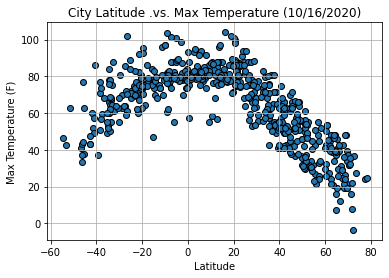

In [24]:
x_values=weather_info['Lat']
y_values=weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Temperature.png")
plt.show()

### Latitude vs. Humidity Plot

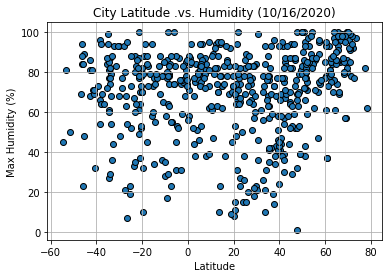

In [25]:
x_values=weather_info['Lat']
y_values=weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (%)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

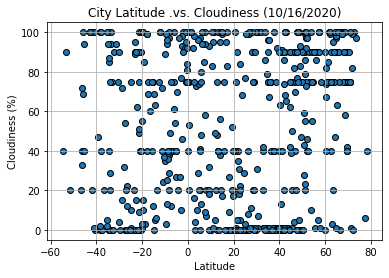

In [26]:
x_values=weather_info['Lat']
y_values=weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

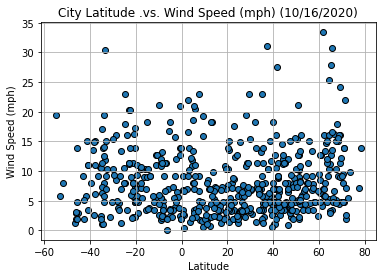

In [27]:
x_values=weather_info['Lat']
y_values=weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Wind_Speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

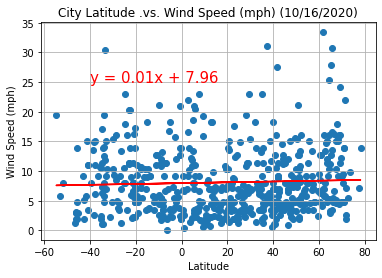

In [28]:
def slope_intercept(xlist,ylist):
    mean_of_x=mean(xlist)
    mean_of_y=mean(ylist)
    
    slope=(((mean_of_x * mean_of_y) - mean(xlist * ylist)) /
          (((mean_of_x)**2) - (mean(xlist**2))))
           
    intercept=mean_of_y - (slope*mean_of_x)
    
    return slope, intercept

#Call lregression function which returns slope and intercept
slope, intercept = slope_intercept(weather_info['Lat'],weather_info['Wind Speed'])          

#Calculate regression line
# formula is y=(slope*x)+intercept
regline=[(slope*x)+intercept for x in weather_info['Lat']]
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))           
plt.scatter(weather_info['Lat'],weather_info['Wind Speed'])
plt.plot(weather_info['Lat'],regline,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/City_Latitude.vs.Wind_Speed.png")
plt.show()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.7469142957586301


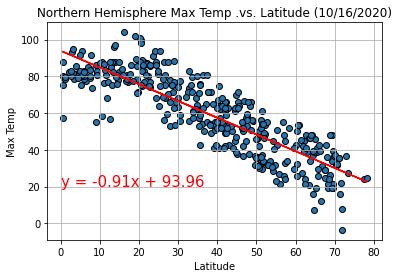

In [29]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere Max Temp .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Max Temp.vs.Latitude.png")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.4440814925344333


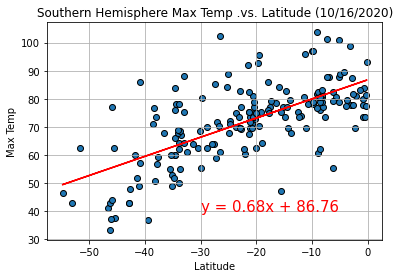

In [30]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Hemisphere Max Temp .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Max Temp.vs.Latitude.png")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.05131757361165456


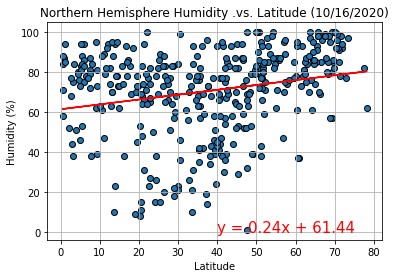

In [31]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,0),fontsize=15,color="red")
plt.title("Northern Hemisphere Humidity .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Humidity.vs.Latitude.png")
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.000290742994856567


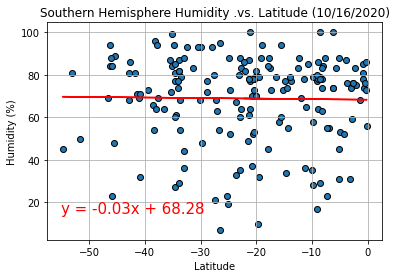

In [32]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Humidity .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Humidity.vs.Latitude.png")
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.058769489921149116


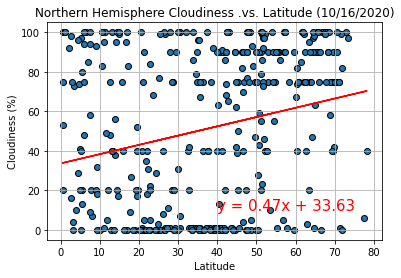

In [33]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Cloudiness.vs.Latitude.png")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.01912079602741595


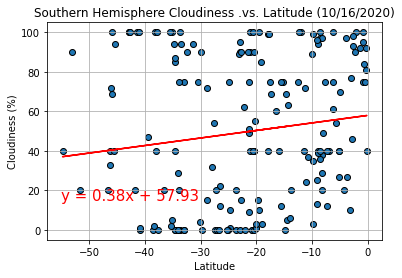

In [34]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Cloudiness .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Cloudiness.vs.Latitude.png")
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.03268370675087175


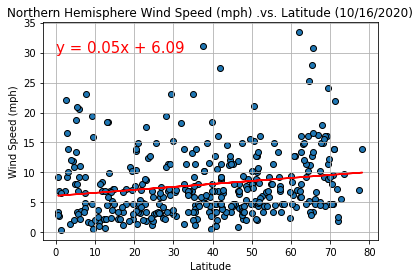

In [35]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("Northern Hemisphere Wind Speed (mph) .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Wind Speed.vs.Latitude.png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.004528967166182425


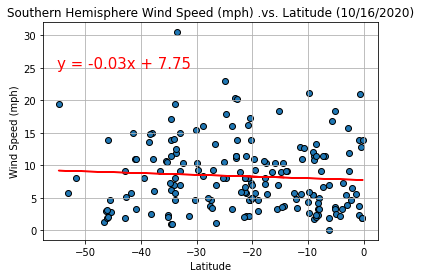

In [36]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere Wind Speed (mph) .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Wind Speed.vs.Latitude.png")
plt.show()

The rvalue is: 0.016354183360883984
The pvalue is: 0.0025415993098104315 This is an unnormalized dataset.


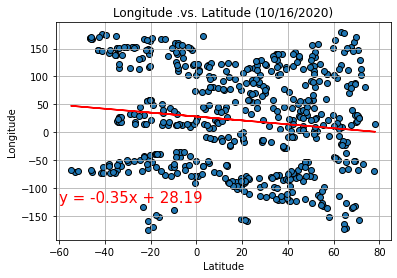

In [37]:
x_values=weather_info['Lat']
y_values=weather_info['Lng']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,-125),fontsize=15,color="red")
plt.title("Longitude .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
if (pvalue<.05):
    distribution="This is an unnormalized dataset."
else:
    distribution="This is a normalized dataset."
print(f"The pvalue is: {pvalue} {distribution}")
plt.savefig("../output_data/Longitude.vs.Latitude.png")
plt.show()